In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np

#file path
melted_AS_path = "Data\\climate_change\\melted_AS_temp_chan.csv"

#read csv file into dataframe
melted_AS_csv = pd.read_csv(melted_AS_path)

In [2]:
melted_AS_csv

,ObjectId,Country,ISO3,Source,CTS_Code,CTS_Full_Descriptor,year,value
0,1,"Afghanistan, Islamic Rep. of",AFG,Food and Agriculture Organization of the Unite...,ECCS,"Environment, Climate Change, Climate Indicator...",1961,-0.113
1,2,Albania,ALB,Food and Agriculture Organization of the Unite...,ECCS,"Environment, Climate Change, Climate Indicator...",1961,0.627
2,3,Algeria,DZA,Food and Agriculture Organization of the Unite...,ECCS,"Environment, Climate Change, Climate Indicator...",1961,0.164
3,4,American Samoa,ASM,Food and Agriculture Organization of the Unite...,ECCS,"Environment, Climate Change, Climate Indicator...",1961,0.079
4,5,"Andorra, Principality of",AND,Food and Agriculture Organization of the Unite...,ECCS,"Environment, Climate Change, Climate Indicator...",1961,0.736
...,...,...,...,...,...,...,...,...
13945,221,Western Sahara,ESH,Food and Agriculture Organization of the Unite...,ECCS,"Environment, Climate Change, Climate Indicator...",2022,1.970
13946,222,World,WLD,Food and Agriculture Organization of the Unite...,ECCS,"Environment, Climate Change, Climate Indicator...",2022,1.394
13947,223,"Yemen, Rep. of",YEM,Food and Agriculture Organization of the Unite...,ECCS,"Environment, Climate Change, Climate Indicator...",2022,NaN
13948,224,Zambia,ZMB,Food and Agriculture Organization of the Unite...,ECCS,"Environment, Climate Change, Climate Indicator...",2022,0.686


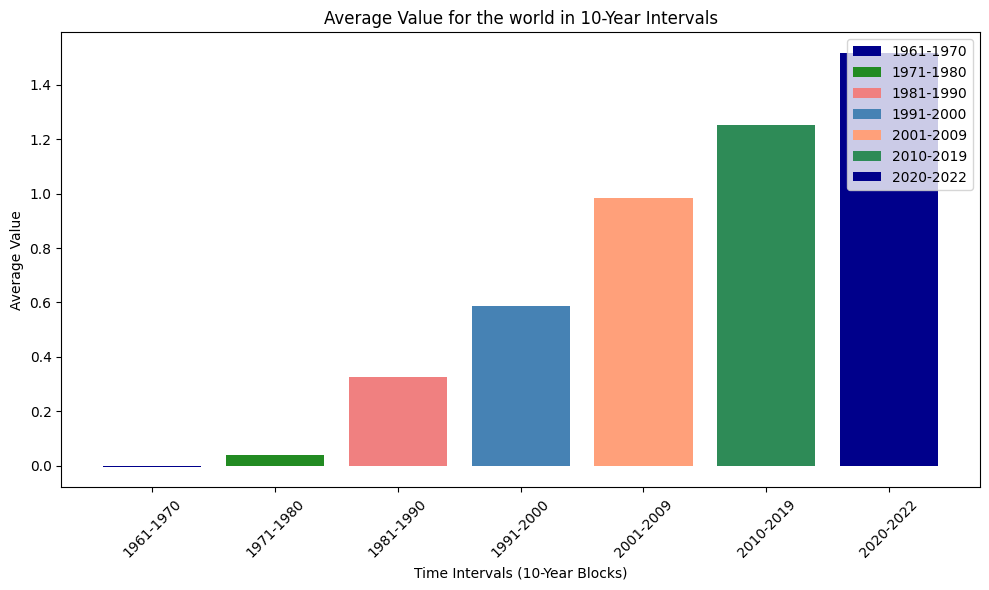

In [3]:
world = melted_AS_csv[melted_AS_csv['Country'] == 'World']

tenyears = [(1961, 1970), (1971, 1980), (1981, 1990), (1991, 2000), (2001, 2009), (2010, 2019), (2020, 2022)]

average = []

colors = ['darkblue', 'forestgreen', 'lightcoral', 'steelblue', 'lightsalmon', 'seagreen']
for start, end in tenyears:
    mask = (world['year'] >= start) & (world['year'] <= end)
    interval = world.loc[mask, 'value'].mean()
    average.append(interval)

plt.figure(figsize=(10, 6))
bars = plt.bar([f'{start}-{end}' for start, end in tenyears], average, color=colors)
plt.xlabel('Time Intervals (10-Year Blocks)')
plt.ylabel('Average Value')
plt.title('Average Value for the world in 10-Year Intervals')

legend_labels = [f'{start}-{end}' for start, end in tenyears]
plt.legend(bars, legend_labels, loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Melted_AS_world_10.png")
plt.show()


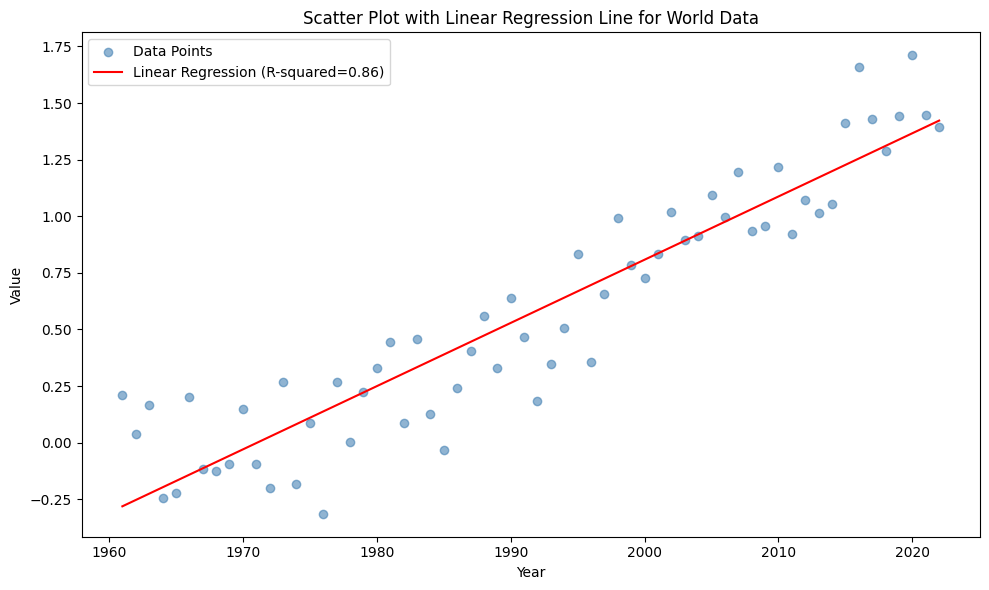

In [4]:
world = melted_AS_csv[melted_AS_csv['Country'] == 'World']

plt.figure(figsize=(10, 6))
plt.scatter(world['year'], world['value'], color='steelblue', label='Data Points', alpha=0.6)

slope, intercept, r_value, p_value, std_err =stats.linregress(world['year'], world['value'])
line = slope * world['year'] + intercept
plt.plot(world['year'], line, color='red', label=f'Linear Regression (R-squared={r_value**2:.2f})')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Scatter Plot with Linear Regression Line for World Data')
plt.legend()

plt.tight_layout()
plt.savefig("Melted_AS_world_10_Scat.png")
plt.show()


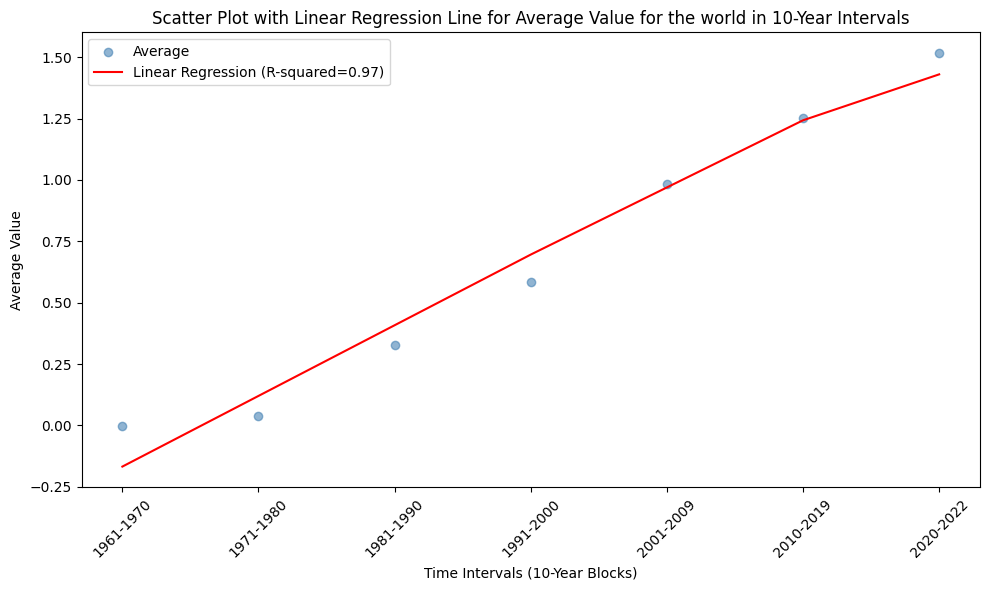

In [5]:
world = melted_AS_csv[melted_AS_csv['Country'] == 'World']

tenyears = [(1961, 1970), (1971, 1980), (1981, 1990), (1991, 2000), (2001, 2009), (2010, 2019), (2020, 2022)]

average = []


for start, end in tenyears:
    mask = (world['year'] >= start) & (world['year'] <= end)
    interval = world.loc[mask, 'value'].mean()
    average.append(interval)

plt.figure(figsize=(10, 6))
plt.scatter([f'{start}-{end}' for start, end in tenyears], average, color='steelblue', label='Average', alpha=0.6)

x_values = [(start + end) / 2 for start, end in tenyears]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, average)
line = [slope * x + intercept for x in x_values]
plt.plot([f'{start}-{end}' for start, end in tenyears], line, color='red', label=f'Linear Regression (R-squared={r_value**2:.2f})')

plt.xlabel('Time Intervals (10-Year Blocks)')
plt.ylabel('Average Value')
plt.title('Scatter Plot with Linear Regression Line for Average Value for the world in 10-Year Intervals')


plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Melted_AS_world_10yr_Scat.png")
plt.show()
